# Introdução

Texto apresentando a pesquisa

## Preparações iniciais - Bibliotecas e Dataset

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('credito.csv')

# Conhecendo o Dataset

### Fonte

O conjunto de dados explorado nessa análise está disponível originalmente na plataforma Kaggle e [pode ser acessado clicando aqui](https://www.kaggle.com/datasets/srgiolutzer/limite-de-crdito-bancrio/data).

In [4]:
# Vizualizando o dataset para impressões iniciais

df.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,na,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


### Descrição segundo a fonte:

Este dataset contém informações de perfil e comportamento de clientes de um banco, incluindo detalhes demográficos e dados relacionados à atividade bancária. O objetivo é fornecer insights sobre os fatores que podem influenciar o padrão de default (inadimplência) dos clientes.

Os dados estão organizados em várias colunas, cada uma representando uma variável diferente, conforme descrito abaixo:

- id: Identificador único para cada cliente.
- default: Uma variável binária indicando se o cliente entrou em default (1 para sim, 0 para não).
- idade: A idade do cliente em anos.
- sexo: O gênero do cliente.
- dependentes: Número de dependentes que o cliente possui.
- escolaridade: Nível de escolaridade do cliente.
- estado_civil: Estado civil do cliente.
- salario_anual: Renda anual do cliente.
- tipo_cartao: Tipo de cartão de crédito que o cliente possui.
- meses_de_relacionamento: Quantidade de meses que o cliente tem um relacionamento com o banco.
- qtd_produtos: Quantidade de produtos que o cliente tem com o banco.
- iteracoes_12m: Quantidade de interações que o cliente teve com o banco nos últimos 12 meses.
- meses_inativo_12m: Quantidade de meses que o cliente esteve inativo nos últimos 12 meses.
- limite_credito: Limite de crédito do cliente.
- valor_transacoes_12m: Valor total das transações que o cliente fez nos últimos 12 meses.
- qtd_transacoes_12m: Quantidade total de transações que o cliente fez nos últimos 12 meses.

Estes dados podem ser usados para construir modelos de machine learning para prever a probabilidade de um cliente entrar em default, possibilitando ao banco tomar medidas preventivas. Além disso, pode-se realizar uma análise exploratória para entender melhor o perfil dos clientes e identificar padrões e tendências.

### Verificações e tratamentos iniciais

Nessa etapa, serão verificadas as estruturas do conjunto de dados, a formatação das informações e adequação das anotações como preparação para a análise.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       10127 non-null  int64 
 1   default                  10127 non-null  int64 
 2   idade                    10127 non-null  int64 
 3   sexo                     10127 non-null  object
 4   dependentes              10127 non-null  int64 
 5   escolaridade             10127 non-null  object
 6   estado_civil             10127 non-null  object
 7   salario_anual            10127 non-null  object
 8   tipo_cartao              10127 non-null  object
 9   meses_de_relacionamento  10127 non-null  int64 
 10  qtd_produtos             10127 non-null  int64 
 11  iteracoes_12m            10127 non-null  int64 
 12  meses_inativo_12m        10127 non-null  int64 
 13  limite_credito           10127 non-null  object
 14  valor_transacoes_12m     10127 non-nul

Ao verificar as informações desse DataFrame, é perceptível que:
- Não há problemas no index;
- Não há dados nulos em todo o DataFrame;
- Há necessidade de tratamento em duas colunas: 'limite_credito' e 'valor_transacoes_12m'
    - Valores são numéricos do tipo float, porém por haver vírgula, foram interpretados como object

In [6]:
# Verificando a padronização das anotações das colunas categóricas.
    # Exemplo: em estado civil, há "casado", "casada" e "casada(o)"?

for col in df[['default', 'sexo', 'escolaridade', 'estado_civil', 'salario_anual', 'tipo_cartao']].columns:
  print(f'Coluna: {col}')
  print(df[col].unique(), '\n')

Coluna: default
[0 1] 

Coluna: sexo
['M' 'F'] 

Coluna: escolaridade
['ensino medio' 'mestrado' 'sem educacao formal' 'na' 'graduacao'
 'doutorado'] 

Coluna: estado_civil
['casado' 'solteiro' 'na' 'divorciado'] 

Coluna: salario_anual
['$60K - $80K' 'menos que $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'na'] 

Coluna: tipo_cartao
['blue' 'gold' 'silver' 'platinum'] 



Com essa última verificação, observa-se que:
- Essas colunas apresentam informações padronizadas;
- As colunas 'escolaridade', 'estado_civil' e 'salario_anual' apresentam o valor **'na'**, indicando a falta da informação.

In [7]:
df.isna().sum()

id                         0
default                    0
idade                      0
sexo                       0
dependentes                0
escolaridade               0
estado_civil               0
salario_anual              0
tipo_cartao                0
meses_de_relacionamento    0
qtd_produtos               0
iteracoes_12m              0
meses_inativo_12m          0
limite_credito             0
valor_transacoes_12m       0
qtd_transacoes_12m         0
dtype: int64

Ao verificar a presença dos valores 'na' ao longo de todo o dataframe, conclui-se que eles foram preenchidos como 'na'.

In [8]:
# Para confirmar se somente as três colunas mencionas possuem valores 'na':

df.isin(['na']).sum()

id                            0
default                       0
idade                         0
sexo                          0
dependentes                   0
escolaridade               1519
estado_civil                749
salario_anual              1112
tipo_cartao                   0
meses_de_relacionamento       0
qtd_produtos                  0
iteracoes_12m                 0
meses_inativo_12m             0
limite_credito                0
valor_transacoes_12m          0
qtd_transacoes_12m            0
dtype: int64

Esses valores 'na' não necessariamnete impactarão nas análises feitas. Portanto, serão mantidos no DataFrame.
Vale ressaltar que são informações que não permitem inferência a partir das demais colunas, logo, caso haja necessidade de removê-los, assim será feito, mas, por hora, serão mantidos para preservar as demais informações de suas linhas.

#### Tratando as colunas 'limite_credito' e 'valor_transacoes_12m'

In [9]:
# Retomando as necessidades de tratamento:

df[['limite_credito', 'valor_transacoes_12m']].head()

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"


In [10]:
df[['limite_credito', 'valor_transacoes_12m']] = df[['limite_credito', 'valor_transacoes_12m']].applymap(lambda x: x.replace('.', '')).applymap(lambda x: x.replace(',', '.')).astype(float)
df[['limite_credito', 'valor_transacoes_12m']].head()

C:\Users\José Henrique\AppData\Local\Temp\ipykernel_3024\2906417258.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[['limite_credito', 'valor_transacoes_12m']] = df[['limite_credito', 'valor_transacoes_12m']].applymap(lambda x: x.replace('.', '')).applymap(lambda x: x.replace(',', '.')).astype(float)


,limite_credito,valor_transacoes_12m
0,12691.51,1144.90
1,8256.96,1291.45
2,3418.56,1887.72
3,3313.03,1171.56
4,4716.22,816.08


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       10127 non-null  int64  
 1   default                  10127 non-null  int64  
 2   idade                    10127 non-null  int64  
 3   sexo                     10127 non-null  object 
 4   dependentes              10127 non-null  int64  
 5   escolaridade             10127 non-null  object 
 6   estado_civil             10127 non-null  object 
 7   salario_anual            10127 non-null  object 
 8   tipo_cartao              10127 non-null  object 
 9   meses_de_relacionamento  10127 non-null  int64  
 10  qtd_produtos             10127 non-null  int64  
 11  iteracoes_12m            10127 non-null  int64  
 12  meses_inativo_12m        10127 non-null  int64  
 13  limite_credito           10127 non-null  float64
 14  valor_transacoes_12m  

## Conhecendo o Dataset - Conclusão

Após as verificações e tratamentos, o dataset está pronto para ser analisado e os possíveis percalços com os valores 'na' já foram evidenciados.

In [12]:
df.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,12691.51,1144.90,42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,8256.96,1291.45,33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,3418.56,1887.72,20
3,769911858,0,40,F,4,ensino medio,na,menos que $40K,blue,34,3,1,4,3313.03,1171.56,20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,4716.22,816.08,28


# Objetivos da análise

Compreender o perfil de clientes que entraram em ***default***.
- Identificar padrões de comportamento e características dos clientes em ***default***.
- Comparar os padrões e características identificados com o grupo de clientes que não está em ***default***.


# Exploração das variáveis

Nessa etapa, as variáveis presentes no Dataset serão avaliadas para a identificação de padrões e percepção de insights.

In [13]:
# Explorando a coluna default

print(f'Valores únicos da variável: {df.default.unique()} \n')

clientes_default = df['default'].sum()
print(f'Total de clientes em default: {clientes_default}\n')

porcentagem_default = round((clientes_default / df.shape[0] * 100), 2)
print(f'Clientes em default representam {porcentagem_default}% do total de clientes.')

Valores únicos da variável: [0 1] 

Total de clientes em default: 1627

Clientes em default representam 16.07% do total de clientes.


Com essa análise, percebe-se que há percentual considerável de clientes em ***default***.
> Vale ressaltar que, nas informações sobre o Dataset, não consta o percentual tolerável de clientes em ***default***.

In [14]:
# Destacando o DataFrame apenas de clientes em default

df_default = df.loc[df['default'] == 1].copy()
df_default.reset_index(drop = True, inplace = True)

# Coluna Id não agrega para essa análise, portanto será retirada.
df_default.drop('id', axis = 1, inplace = True)

# Como esse dataframe é constituido apenas de clientes em default, a coluna default também não agrega para essa análise
df_default.drop('default', axis = 1, inplace = True)

df_default.head()

,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,62,F,0,mestrado,casado,menos que $40K,blue,49,2,3,3,1438.73,692.25,16
1,66,F,0,doutorado,casado,na,blue,56,5,3,4,7882.47,704.78,16
2,54,F,1,mestrado,casado,menos que $40K,blue,40,2,1,3,1438.08,705.59,19
3,56,M,2,mestrado,casado,$120K +,blue,36,1,3,3,15769.34,602.60,15
4,48,M,2,mestrado,casado,$60K - $80K,silver,35,2,4,4,34516.60,691.10,15


Com o destaque dos clientes em Default, é válida uma análise geral dos dados

In [15]:
# Visão geral dos dados numéricos

df_default.describe()

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
count,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000
mean,46.659496,2.402581,36.178242,3.279656,2.972342,2.693301,8136.519533,3095.515765,44.933620
std,7.665652,1.275010,7.796548,1.577782,1.090537,0.899623,9095.348927,2308.213713,14.568429
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.000000,510.160000,10.000000
25%,41.000000,2.000000,32.000000,2.000000,2.000000,2.000000,2114.185000,1904.075000,37.000000
50%,47.000000,2.000000,36.000000,3.000000,3.000000,3.000000,4178.030000,2329.240000,43.000000
75%,52.000000,3.000000,40.000000,5.000000,4.000000,3.000000,9933.665000,2772.615000,51.000000
max,68.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.980000,10583.790000,94.000000


Os valores encontrados nas colunas numéricas seguem, de forma geral, comportamento adequado para o contexto.

As colunas 'limite_credito', 'valor_trasacoes_12m' e 'qtd_trasacoes_12m' apresentem valores máximos que valem ser investigados como possíveis outliers devido distanciamento do terceiro quartil e do efeito que causam na média.

Para tal serão analisados boxplots dessas colunas.

Text(0, 0.5, 'Qtd transações 12m')

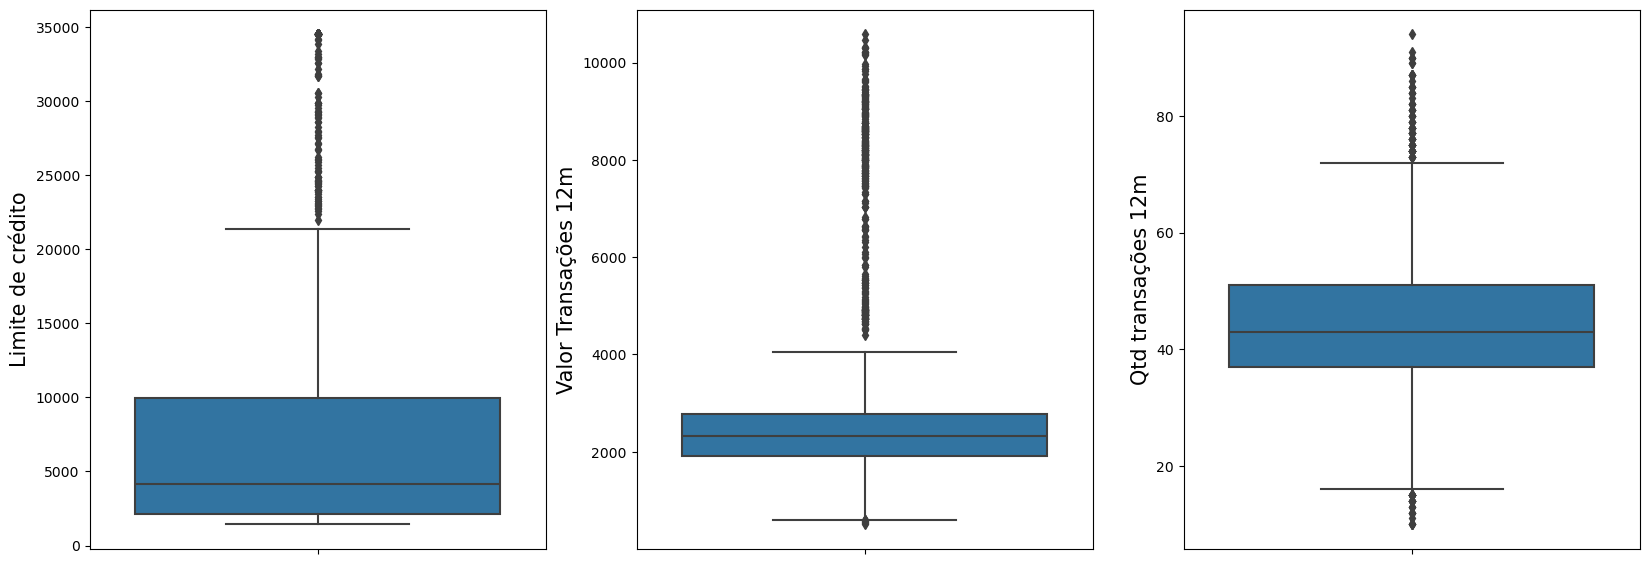

In [47]:
# Gerando bloxpot das colunas 'limite_credito', 'valor_transacoes_12m' e 'qtd_transacoes_12m'

fig, axs = plt.subplots(1, 3, figsize = (20, 7))

box_1 = sns.boxplot(data = df_default, y = 'limite_credito', ax = axs[0])
box_1.set_ylabel('Limite de crédito', fontsize = 15)

box_2 = sns.boxplot(data = df_default, y = 'valor_transacoes_12m', ax = axs[1])
box_2.set_ylabel('Valor Transações 12m', fontsize = 15)

box_3 = sns.boxplot(data = df_default, y = 'qtd_transacoes_12m', ax = axs[2])
box_3.set_ylabel('Qtd transações 12m', fontsize = 15)


Os boxplots indicam grande quantidade de outliers nas colunas destacadas. <br>
Usando as informações fornecidas nesse Dataset e de acordo com as descrições de cada coluna, não é possível verificar se os valores entregues são fruto de erro de cálculo ou de digitação.

Portanto, será investigada a relevância do limite de crétido nesse contexto, pois quanto maior o limite, mais possibilidades de uso os clientes possuem.

Text(0.5, 0, 'Tipo de cartão')

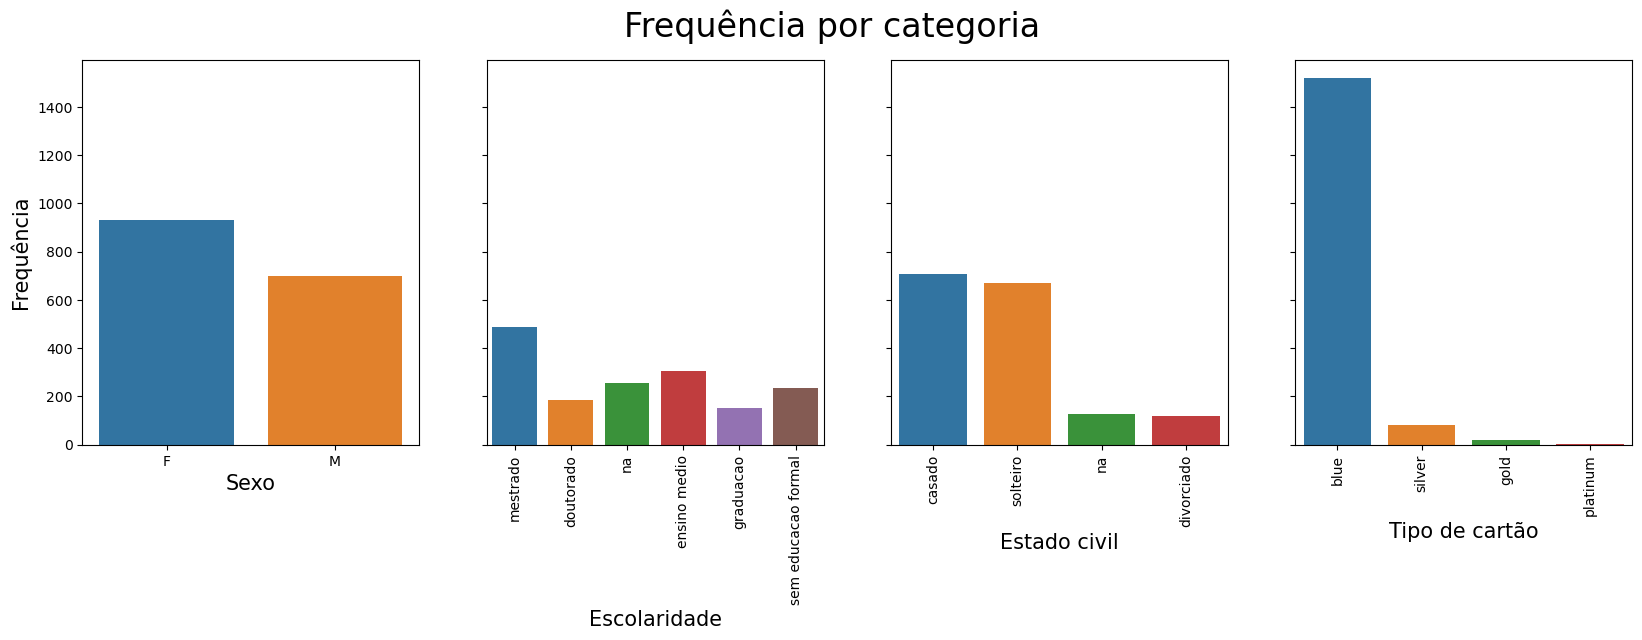

In [17]:
# Visão geral dos dados categóricos através de gráficos

fig, axs = plt.subplots(1,4, figsize = (20, 5), sharey = True)
fig.suptitle('Frequência por categoria', fontsize = 24)

g1 = sns.countplot(data = df_default, x = 'sexo', ax = axs[0])
g1.set_ylabel('Frequência', fontsize = 15)
g1.set_xlabel('Sexo', fontsize = 15)

g2 = sns.countplot(data = df_default, x = 'escolaridade', ax = axs[1])
g2.set_ylabel('')
g2.tick_params(axis='x', labelrotation=90)
g2.set_xlabel('Escolaridade', fontsize = 15)

g3 = sns.countplot(data = df_default, x = 'estado_civil', ax = axs[2])
g3.set_ylabel('')
g3.tick_params(axis='x', labelrotation=90)
g3.set_xlabel('Estado civil', fontsize = 15)

g4 = sns.countplot(data = df_default, x = 'tipo_cartao', ax = axs[3])
g4.set_ylabel('')
g4.tick_params(axis='x', labelrotation=90)
g4.set_xlabel('Tipo de cartão', fontsize = 15)

## Default exploração univariada - conclusões